In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import  LabelEncoder,OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
import seaborn as sns

np.random.seed(7)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
!ls "/content/gdrive/My Drive/ML_DataSet/AirPolution_Beijing.csv"


'/content/gdrive/My Drive/ML_DataSet/AirPolution_Beijing.csv'


In [5]:
dataset=pd.read_csv('/content/gdrive/My Drive/ML_DataSet/AirPolution_Beijing.csv')
dataset.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [6]:
dataset.dtypes

No         int64
year       int64
month      int64
day        int64
hour       int64
pm2.5    float64
DEWP       int64
TEMP     float64
PRES     float64
cbwd      object
Iws      float64
Is         int64
Ir         int64
dtype: object

In [7]:
dataset['date']=pd.to_datetime(dataset[['year','month','day','hour']],format="%y%m%d%h")
dataset['date'].head()

0   2010-01-01 00:00:00
1   2010-01-01 01:00:00
2   2010-01-01 02:00:00
3   2010-01-01 03:00:00
4   2010-01-01 04:00:00
Name: date, dtype: datetime64[ns]

In [9]:
#df=dataset.copy()
#df=df.iloc[24:,:]
#df['pm2.5']=df['pm2.5'].fillna(df['pm2.5'].mean())
#plt.plot(df.iloc[:24*7,5:6])
#plt.title('Plot of 1st one week Pollution day(2-1-2010 to 8-1-2010) of  Data Set')
#plt.xlabel('Time')
#plt.ylabel('Pollution')
#plt.show()   


In [ ]:
#print(dataset.dtypes)
dataset.drop(['No','year','month','day','hour'],axis=1,inplace=True)

dataset=dataset.set_index('date')
dataset.columns = ['pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain']
dataset.head()

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-01 00:00:00,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,NaN,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,NaN,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [ ]:
dataset.shape

(43824, 8)

In [ ]:
dataset=dataset.iloc[24:,:]
dataset.head()

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [ ]:
dataset.shape

(43800, 8)

In [ ]:
dataset.describe()

,pollution,dew,temp,press,wnd_spd,snow,rain
count,41757.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000
mean,98.613215,1.828516,12.459041,1016.447306,23.894307,0.052763,0.195023
std,92.050387,14.429326,12.193384,10.271411,50.022729,0.760582,1.416247
min,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43800 entries, 2010-01-02 00:00:00 to 2014-12-31 23:00:00
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pollution  41757 non-null  float64
 1   dew        43800 non-null  int64  
 2   temp       43800 non-null  float64
 3   press      43800 non-null  float64
 4   wnd_dir    43800 non-null  object 
 5   wnd_spd    43800 non-null  float64
 6   snow       43800 non-null  int64  
 7   rain       43800 non-null  int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 3.0+ MB


In [ ]:
#check if any NaN Value present or Not
print(dataset.isnull().any())
dataset.isnull().sum()

pollution     True
dew          False
temp         False
press        False
wnd_dir      False
wnd_spd      False
snow         False
rain         False
dtype: bool


pollution    2043
dew             0
temp            0
press           0
wnd_dir         0
wnd_spd         0
snow            0
rain            0
dtype: int64

In [ ]:
#fill the NaN value with the mean
dataset['pollution']=dataset['pollution'].fillna(dataset['pollution'].mean())

In [ ]:
#check if any NaN Value present or Not
print(dataset.isnull().any())
dataset.isnull().sum()

pollution    False
dew          False
temp         False
press        False
wnd_dir      False
wnd_spd      False
snow         False
rain         False
dtype: bool


pollution    0
dew          0
temp         0
press        0
wnd_dir      0
wnd_spd      0
snow         0
rain         0
dtype: int64

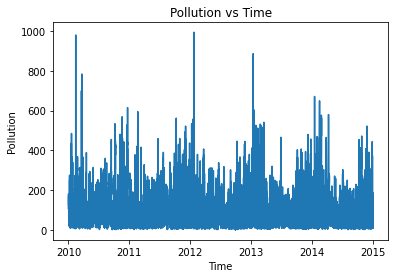

In [ ]:
#plot the whole dataset the Pollution Column
plt.plot(dataset.iloc[:,0:1])
plt.xlabel('Time')
plt.ylabel('Pollution')
plt.title('Pollution vs Time')
plt.show()

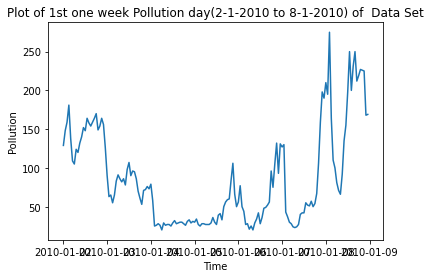

In [ ]:
plt.plot(dataset.iloc[:24*7,0:1])
plt.title('Plot of 1st one week Pollution day(2-1-2010 to 8-1-2010) of  Data Set')
plt.xlabel('Time')
plt.ylabel('Pollution')
plt.show()

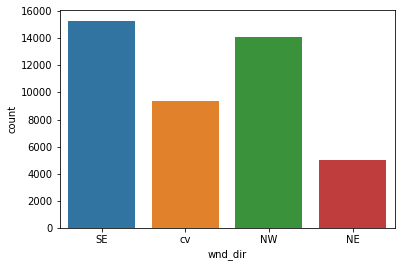

In [ ]:
#check How many cataegory present in wnd_dir collumn
sns.countplot(x="wnd_dir",data=dataset)
plt.show()

In [ ]:
# encoded the categorical value
encoder=LabelEncoder()
dataset.iloc[:,4]=encoder.fit_transform(dataset.iloc[:,4])
print(type(dataset))
dataset.head()

<class 'pandas.core.frame.DataFrame'>


,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,2,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,2,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,2,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,2,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,2,6.25,2,0


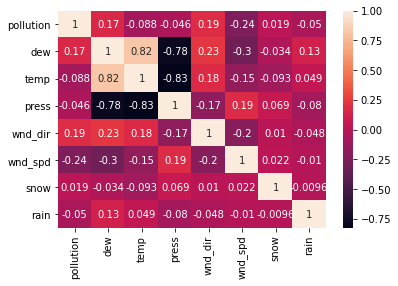

In [ ]:
#perform corelation matrix
corrMatrix=dataset.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
dataset=dataset.astype('float32')

In [ ]:
# Take only pollution , dew, wnd_dir,wnd_spd collumn
#Drop the other collumn , As those collumn are no corelation with the pollution collumn 
dataset=dataset.iloc[:,[0,1,4,5]]
dataset.head()

,pollution,dew,wnd_dir,wnd_spd
date,,,,
2010-01-02 00:00:00,129.0,-16.0,2.0,1.79
2010-01-02 01:00:00,148.0,-15.0,2.0,2.68
2010-01-02 02:00:00,159.0,-11.0,2.0,3.57
2010-01-02 03:00:00,181.0,-7.0,2.0,5.36
2010-01-02 04:00:00,138.0,-7.0,2.0,6.25


In [ ]:
#perform OneHotEncoding for dummy variable
df=dataset.copy()
transformer = ColumnTransformer([('one_hot_encoder', OneHotEncoder(), [2])],remainder='passthrough')
df = np.array(transformer.fit_transform(df), dtype=np.float)
print(df.shape)
#avoiding dummy variable trap
df=df[:,1:]
df.shape

(43800, 7)


(43800, 6)

In [ ]:
df[:2,:]

array([[  0.        ,   1.        ,   0.        , 129.        ,
        -16.        ,   1.78999996],
       [  0.        ,   1.        ,   0.        , 148.        ,
        -15.        ,   2.68000007]])

In [ ]:
#perform Normalization
sc=MinMaxScaler(feature_range=(0,1))
data_set_scaled=sc.fit_transform(df)
type(data_set_scaled)

numpy.ndarray

In [ ]:
#Divided whole dataset into train and test
# 1st 4th year data for training 
#last year data for testing
x=len(dataset)-365*24
train_scaled=data_set_scaled[:x,:]
test_scaled=data_set_scaled[x:,3:4]

In [ ]:
print(train_scaled)
(test_scaled.shape)

[[0.         1.         0.         0.12977867 0.35294118 0.00229001]
 [0.         1.         0.         0.14889336 0.36764706 0.00381099]
 [0.         1.         0.         0.15995976 0.42647059 0.00533197]
 ...
 [1.         0.         0.         0.02313883 0.27941176 0.21387679]
 [1.         0.         0.         0.02012072 0.27941176 0.2222849 ]
 [1.         0.         0.         0.02313883 0.29411765 0.23450398]]


(8760, 1)

In [ ]:
#funcition for converting our own Sequence dataset for training
#I take previous 24 hour data for dependent variable and next 1 hour data  for Independent variable
# t-24 to t hour data for X_train and t+1 hour data for y_train


def Series_to_Supervised(train_scaled):
    X_train=[]
    y_train=[]
    for i in range(24,len(train_scaled)):
        X_train.append(train_scaled[i-24:i,:])
        y_train.append(train_scaled[i,3:4])
    return X_train,y_train

In [ ]:
#function calling
X_train,y_train=Series_to_Supervised(train_scaled)
type(X_train)

list

In [ ]:
#function for testing 
def Series_to_Supervised_for_Testing(data_set_scaled):
  X_test_check=data_set_scaled[len(train_scaled)-24:,:]
  X_test=[]
  for i in range(24,len(X_test_check)):
    X_test.append(X_test_check[i-24:i,:])
  return X_test

In [ ]:
#function calling
X_test=Series_to_Supervised_for_Testing(data_set_scaled)
type(X_test)

list

In [ ]:
#converting list to array
X_train,y_train=np.array(X_train),np.array(y_train)
X_test=np.array(X_test)

In [ ]:
print('X_Traing Shape',X_train.shape)
print('Y_Traing Shape',y_train.shape)
print('X_Testing Shape',X_test.shape)
print('Y_Testing Shape',test_scaled.shape)

X_Traing Shape (35016, 24, 6)
Y_Traing Shape (35016, 1)
X_Testing Shape (8760, 24, 6)
Y_Testing Shape (8760, 1)


In [ ]:
#Initialize the RNN model
regressor = Sequential()

#1st LSTM layer with Dropout Regulaziation
regressor.add(LSTM(units=100,return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(0.3))

#2nd  LSTM layer 
regressor.add(LSTM(units = 75,return_sequences = True))
regressor.add(Dropout(0.25))

#3rd  LSTM layer 
regressor.add(LSTM(units = 50, return_sequences = False))
regressor.add(Dropout(0.2))

#Output Layer
regressor.add(Dense(units = 1))

In [ ]:
#Compile the model 
regressor.compile(optimizer = 'RMSProp', loss = 'mean_squared_error')

#fit the model
history=regressor.fit(X_train, y_train, epochs = 100, batch_size = 72,validation_data=(X_test,test_scaled))

Epoch 1/100
487/487 [==============================] - 37s 76ms/step - loss: 0.0033 - val_loss: 0.0019
Epoch 2/100
487/487 [==============================] - 36s 74ms/step - loss: 0.0014 - val_loss: 9.6109e-04
Epoch 3/100
487/487 [==============================] - 36s 74ms/step - loss: 0.0011 - val_loss: 6.2827e-04
Epoch 4/100
487/487 [==============================] - 36s 74ms/step - loss: 9.3710e-04 - val_loss: 9.2575e-04
Epoch 5/100
487/487 [==============================] - 36s 75ms/step - loss: 8.8895e-04 - val_loss: 6.9692e-04
Epoch 6/100
487/487 [==============================] - 36s 74ms/step - loss: 8.8127e-04 - val_loss: 5.3798e-04
Epoch 7/100
487/487 [==============================] - 36s 74ms/step - loss: 8.3102e-04 - val_loss: 7.1480e-04
Epoch 8/100
487/487 [==============================] - 36s 75ms/step - loss: 8.3100e-04 - val_loss: 6.7216e-04
Epoch 9/100
487/487 [==============================] - 36s 74ms/step - loss: 7.9926e-04 - val_loss: 5.5098e-04
Epoch 10/100
487/

In [ ]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 24, 100)           42800     
_________________________________________________________________
dropout (Dropout)            (None, 24, 100)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 24, 75)            52800     
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 75)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                25200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 5

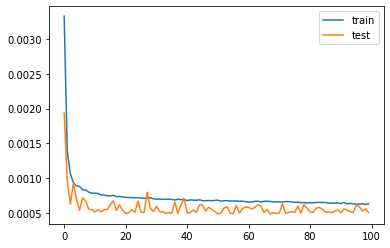

In [ ]:
#plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
#Predict for the test value
y_pred=regressor.predict(X_test)
y_pred

array([[0.0218702 ],
       [0.02214672],
       [0.03940976],
       ...,
       [0.0140571 ],
       [0.01408417],
       [0.01336164]], dtype=float32)

In [ ]:
#inverse transform for actual range
sc=MinMaxScaler(feature_range=(0,1))
data_set_scaled=sc.fit_transform(dataset.iloc[:,0:1].values)
y_pred=sc.inverse_transform(y_pred)
y_real=sc.inverse_transform(test_scaled)

In [ ]:
print(y_pred)
y_real

[[21.738976]
 [22.013845]
 [39.173298]
 ...
 [13.972757]
 [13.999663]
 [13.281471]]


array([[24.00000084],
       [53.00000186],
       [65.00000229],
       ...,
       [10.00000035],
       [ 8.00000028],
       [12.00000042]])

In [ ]:
#RMSE for TEsting Dataset
RMSE=np.sqrt(mean_squared_error(y_real,y_pred))
print('RMSE value of Testing',RMSE)

RMSE value of Testing 22.31409401003016


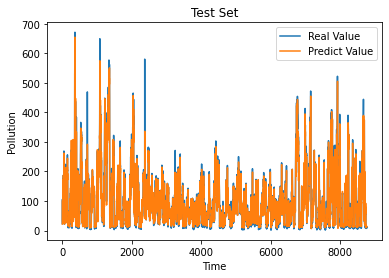

In [ ]:
#Test Set plot
plt.plot(y_real,label='Real Value')
plt.plot(y_pred,label='Predict Value')
plt.title('Test Set')
plt.xlabel('Time')
plt.ylabel('Pollution')
plt.legend()
plt.show()

In [ ]:
#Traing Set
X_pred=regressor.predict(X_train)
X_pred=sc.inverse_transform(X_pred)
#X_real=y_train.reshape(-1,1)
X_real=sc.inverse_transform(y_train)
#X_real.reshape(-1,1)
RMSE_train=np.sqrt(mean_squared_error(X_real,X_pred))
print('RMSE value for Traing Set',RMSE_train)

RMSE value for Traing Set 23.337522937218484


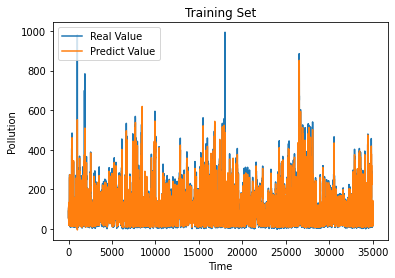

In [ ]:
#Traing Set plot
plt.plot(X_real,label='Real Value')
plt.plot(X_pred,label='Predict Value')
plt.title('Training Set')
plt.xlabel('Time')
plt.ylabel('Pollution')
plt.legend()
plt.show()

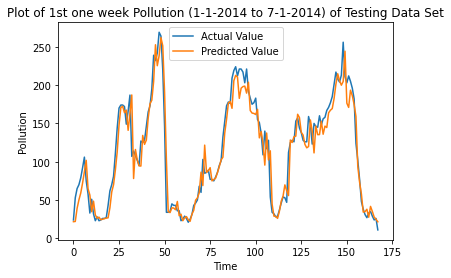

In [ ]:
plt.plot(y_real[:24*7,0],label='Actual Value ')
plt.plot(y_pred[:24*7,0],label='Predicted Value')
plt.title('Plot of 1st one week Pollution (1-1-2014 to 7-1-2014) of Testing Data Set')
plt.xlabel('Time')
plt.ylabel('Pollution')
plt.legend()
plt.show()

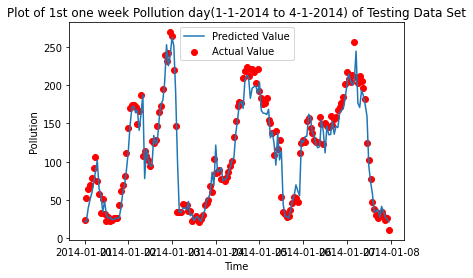

In [ ]:
plt.scatter(x=dataset.index[len(dataset)-365*24:len(train_scaled)+24*7],y=dataset['pollution'].iloc[len(dataset)-365*24:len(train_scaled)+24*7],color='red',label='Actual Value')
plt.plot(dataset.index[len(dataset)-365*24:len(train_scaled)+24*7],y_pred[:24*7,0],label='Predicted Value')
plt.title('Plot of 1st one week Pollution day(1-1-2014 to 4-1-2014) of Testing Data Set')
plt.xlabel('Time')
plt.ylabel('Pollution')
plt.legend()
plt.show()